In [8]:
import warnings

from HW1.coord_relaxer import LinearCoordRelaxer
from HW1.visualize import draw_2D, draw_3D
from grad import *

Метод золотого сечения.
---

0. Берем отрезок [a, b]
1. Ставим на нем две точки `x1` и `x2` в пропорции золотого сечения.
    $x_1 = b - {b - a \over \phi}$
    $x_2 = a + {b - a \over \phi}$
2. Считаем значения в этих точках
    $y_1 = f(x_1)$
    $y_2 = f(x_2)$
3. Проверяем, если $|y_1 - y_2| < \varepsilon$, значит мы достаточно близко к ответу (с точностью $\varepsilon$). Здачит, завершаем программу.
4. Сдвигаем границы
    Если $y_1 \leq y_2 \Rightarrow b = x_2, x_2 = x_1, x_1 = b - {b - a \over \phi}, y_2 = y_1, y_1 = f(x_1)$
    Если $y_2 \leq y_1 \Rightarrow a = x_1, x_1 = x_2, x_2 = a + {b - a \over \phi}, y_1 = y_2, y_2 = f(x_2)$
5. Возвращаемся к пункту `3`

# Example 1

> $dim = 1$.
>
> $f(x) = x - sin(x)$, where $x \geq 0; -x$, otherwise

In [9]:
def f(coord):
    if coord >= 0:
        return coord - np.sin(coord)
    else:
        return -coord

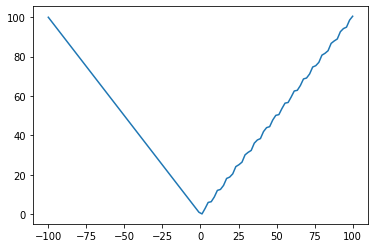

In [10]:
draw_2D(f)

[1.13676713e-05] [2.44829791e-16]
{'gradient_call_count': 120, 'function_call_count': 2053, 'points': array([[-3.53460042e+01,  3.53460042e+01],
       [-3.48460072e+01,  3.48460072e+01],
       [-3.43460102e+01,  3.43460102e+01],
       [-3.38460131e+01,  3.38460131e+01],
       [-3.33460161e+01,  3.33460161e+01],
       [-3.28460191e+01,  3.28460191e+01],
       [-3.23460221e+01,  3.23460221e+01],
       [-3.18460251e+01,  3.18460251e+01],
       [-3.13460280e+01,  3.13460280e+01],
       [-3.08460310e+01,  3.08460310e+01],
       [-3.03460340e+01,  3.03460340e+01],
       [-2.98460370e+01,  2.98460370e+01],
       [-2.93460400e+01,  2.93460400e+01],
       [-2.88460429e+01,  2.88460429e+01],
       [-2.83460459e+01,  2.83460459e+01],
       [-2.78460489e+01,  2.78460489e+01],
       [-2.73460519e+01,  2.73460519e+01],
       [-2.68460549e+01,  2.68460549e+01],
       [-2.63460578e+01,  2.63460578e+01],
       [-2.58460608e+01,  2.58460608e+01],
       [-2.53460638e+01,  2.53460638e+

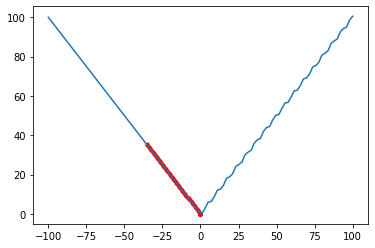

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (x, y), meta = gradient_descent(f, 1, coord_relaxer=LinearCoordRelaxer(f, alpha=5, eps=1e-5))
    print(x, y)
    print(meta)

    draw_2D(f, meta["points"])

# Example 2

> $dim = 2$.
>
> $f(x, y) = sin(x / 20) * cos(e + y / 20)$

In [12]:
def f(coord):
    return np.sin(coord[0] / 20) * np.cos(np.e + coord[1] / 20)

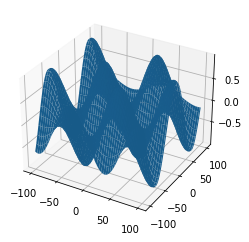

In [13]:
draw_3D(f)

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/HW1/grad.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([coord, f(coord)]).reshape(1, 2),


[31.27991574  8.41126048] -0.9999731013015252
{'gradient_call_count': 508, 'function_call_count': 8070, 'points': array([[array([3.75113778, 3.26388479]), -0.18018670098883863],
       [array([3.96450222, 3.27430327]), -0.19033115912040136],
       [array([4.17745203, 3.28543487]), -0.20043899059820303],
       ...,
       [array([31.27754746,  8.41048825]), -0.9999721821826805],
       [array([31.27873671,  8.41087571]), -0.9999726456201201],
       [array([31.27991574,  8.41126048]), -0.9999731013015252]],
      dtype=object)}


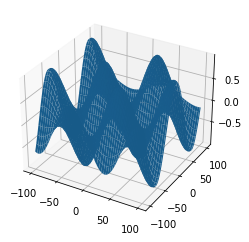

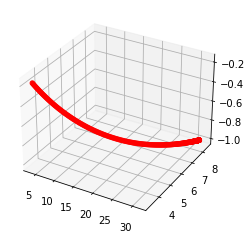

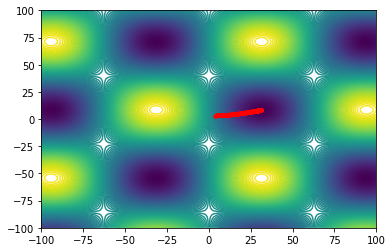

In [14]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (xs, y), meta = gradient_descent(f, 2, lr=0.9, coord_relaxer=LinearCoordRelaxer(f, alpha=5, eps=1e-3))
    print(xs, y)
    print(meta)

    draw_3D(f, meta["points"])